<a href="https://colab.research.google.com/github/seunghy1468/Sparta_Coding_Machine_Learning/blob/main/2%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_02_%EB%8B%A4%ED%95%AD_%EB%85%BC%EB%A6%AC_%ED%9A%8C%EA%B7%80%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 다운로드

와인 데이터셋: https://www.kaggle.com/brynja/wineuci

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'kairess' # username
os.environ['KAGGLE_KEY'] = '7d0443b2dfffc57c94271fd797511896' # key

In [ ]:
!kaggle datasets download -d brynja/wineuci

  0% 0.00/4.20k [00:00<?, ?B/s]
100% 4.20k/4.20k [00:00<00:00, 8.26MB/s]


In [ ]:
!unzip wineuci.zip

Archive:  wineuci.zip
  inflating: Wine.csv                


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# 데이터셋 로드

In [ ]:
df = pd.read_csv('Wine.csv')

df.head(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# 헤더의 내용을 채워주기

이 데이터셋은 데이터프레임의 헤더가 없는데 헤더의 내용을 채워주도록 하겠습니다. 대다수의 데이터셋에는 각 칼럼에 대한 헤더와 설명이 있으니 걱정마시구요.

In [ ]:
df = pd.read_csv('Wine.csv', names=[
  'name'
  ,'alcohol'
  ,'malicAcid'
  ,'ash'
  ,'ashalcalinity'
  ,'magnesium'
  ,'totalPhenols'
  ,'flavanoids'
  ,'nonFlavanoidPhenols'
  ,'proanthocyanins'
  ,'colorIntensity'
  ,'hue'
  ,'od280_od315'
  ,'proline'
])

df.head(5)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 정답 라벨의 개수 확인

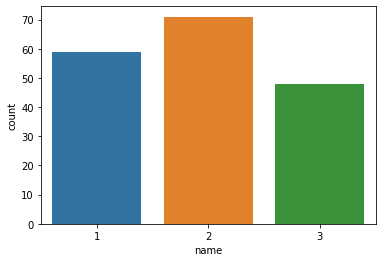

In [ ]:
sns.countplot(x=df['name'])

# 전처리

## 비어있는 행 확인

In [ ]:
print(df.isnull().sum())

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64


## X, y 데이터 분할

In [ ]:
x_data = df.drop(columns=['name'], axis=1)
x_data = x_data.astype(np.float32)

x_data.head(5)

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,2.43,15.600000,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.200000,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.600000,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.799999,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.000000,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y_data = df[['name']]
y_data = y_data.astype(np.float32)

y_data.head(5)

,name
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


## 데이터 표준화

In [ ]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)

print(x_data.values[0])
print(x_data_scaled[0])

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
[ 1.5186119  -0.5622497   0.2320528  -1.1695931   1.9139051   0.8089973
  1.0348189  -0.65956306  1.2248839   0.2517168   0.3621771   1.8479197
  1.013009  ]


## One-hot encoding

In [ ]:
encoder = OneHotEncoder()
y_data_encoded = encoder.fit_transform(y_data).toarray()

print(y_data.values[0])
print(y_data_encoded[0])

[1.]
[1. 0. 0.]


# 학습/검증 데이터 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data_scaled, y_data_encoded, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(142, 13) (36, 13)
(142, 3) (36, 3)


# 모델 학습

In [ ]:
model = Sequential([
  Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.02), metrics=['acc'])

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=20 # epochs 복수형으로 쓰기!
)

Epoch 1/20
5/5 [==============================] - 1s 115ms/step - loss: 1.2892 - acc: 0.3798 - val_loss: 1.0719 - val_acc: 0.4444
Epoch 2/20
5/5 [==============================] - 0s 11ms/step - loss: 0.6915 - acc: 0.7560 - val_loss: 0.6363 - val_acc: 0.7222
Epoch 3/20
5/5 [==============================] - 0s 11ms/step - loss: 0.4333 - acc: 0.8604 - val_loss: 0.4207 - val_acc: 0.8333
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.2794 - acc: 0.9227 - val_loss: 0.3199 - val_acc: 0.8889
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 0.1802 - acc: 0.9590 - val_loss: 0.2684 - val_acc: 0.8611
Epoch 6/20
5/5 [==============================] - 0s 11ms/step - loss: 0.1637 - acc: 0.9548 - val_loss: 0.2342 - val_acc: 0.8889
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.1260 - acc: 0.9840 - val_loss: 0.2099 - val_acc: 0.8889
Epoch 8/20
5/5 [==============================] - 0s 12ms/step - loss: 0.1150 - acc: 0.9788 - va